# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Things that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Python (Jupyter notebooks) and Linear Regression. Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Function to calculate the Gradient descent

 $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \big(h_\theta(x^{(i)}) - y^{(i)} \big) x^{(i)}_{j}$
 

In [2]:
# Octave code
# X = [1,0;1,0.5;1,1;1,1.5;1,2;1,2.5;1,3;1,4;1,5]
# Y = [0,0.5,1,1.5,2,2.5,3,4,5]
# m = length(X)
# h_theta = sum(theta' .* X, 2)

# for j = 1:length(theta)
#     theta(j) = theta(j) - (alpha * 1/m * sum((h_theta - Y) .* X(1:end,j)))
# end

In [44]:
def gradient_descent(x, y, theta, alpha, m, maxsteps):
    
    theta_hist = np.empty([maxsteps, 2])
    xT = x.transpose()
    
    for i in range(0, maxsteps):
        
        # calculate h theta (so that there are no concurrent update issues)
        h_theta = np.sum(np.multiply(theta.transpose(), x), axis=1)
        
        # update theta
        for j in range(len(theta)):
            theta[j] = theta[j] - (alpha * 1/m * np.sum(np.multiply((h_theta - y), x[0:,j])))
        
        #record theta in the history
        theta_hist[i] = theta
        
    return theta, theta_hist

In [46]:
# Test gradient descent
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])
theta = np.array([0.5,0.5])
alpha = 0.1
m = len(x)

# h_theta = np.sum(np.multiply(theta.transpose(), x), axis=1)
# print(h_theta)

theta, theta_hist = gradient_descent(x, y, theta, alpha, m, 100)
print(theta_hist)

[[0.55833333 0.74583333]
 [0.55756944 0.80489583]
 [0.54408507 0.82228791]
 [0.52818085 0.83028221]
 [0.51213495 0.83605979]
 [0.49644184 0.84122153]
 [0.48119965 0.84612722]
 [0.46641879 0.85086051]
 [0.45209047 0.85544358]
 [0.43820198 0.85988478]
 [0.42474008 0.8641893 ]
 [0.41169172 0.86836153]
 [0.39904422 0.87240557]
 [0.38678526 0.87632538]
 [0.3749029  0.88012476]
 [0.36338558 0.88380743]
 [0.35222208 0.88737696]
 [0.34140153 0.89083683]
 [0.3309134  0.89419041]
 [0.32074747 0.89744097]
 [0.31089385 0.90059166]
 [0.30134293 0.90364557]
 [0.29208543 0.90660566]
 [0.28311233 0.90947481]
 [0.27441489 0.91225581]
 [0.26598464 0.91495139]
 [0.25781338 0.91756415]
 [0.24989314 0.92009664]
 [0.24221622 0.92255134]
 [0.23477514 0.92493063]
 [0.22756266 0.92723682]
 [0.22057175 0.92947216]
 [0.2137956  0.93163884]
 [0.20722763 0.93373895]
 [0.20086143 0.93577454]
 [0.1946908  0.9377476 ]
 [0.18870974 0.93966004]
 [0.18291243 0.94151373]
 [0.17729321 0.94331048]
 [0.17184662 0.94505203]


## Function to calculate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the debugging (having not only the cost but also the difference between y and the prediction directly). You do not need to use both. Just the cost is enough to complete the assignment.

In [5]:
# Octave Code:
# X = [1,0;1,0.5;1,1;1,1.5;1,2;1,2.5;1,3;1,4;1,5]
# Y = [0,0.5,1,1.5,2,2.5,3,4,5]
# m = length(X)
# h_theta = sum(theta' .* X, 2)
# cost = sum((h_theta - Y).^2)/(2*m)


In [6]:
def cost_function(x, y, theta):
    
    m = len(x)
    h_theta = np.sum(np.multiply(theta.transpose(), x), axis=1)
    cost = (1/2*m) * (np.sum(np.square(h_theta - y))) 
    
    return cost

In [7]:
# Test Cost
x = np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])
theta = np.array([0,0.5])
m = len(x)

cost = cost_function(x,y,theta)
print(cost)
# print(loss)


71.71875


## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with different samples). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [8]:
x = np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [9]:
m, n = np.shape(x)

## Plot training set


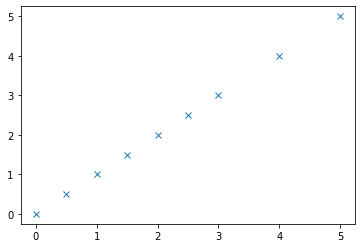

In [10]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x');

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [28]:
theta0 = np.arange(-3, 3.01, 0.25)
theta1 = np.arange(-3, 3.01, 0.25)
J = np.empty([len(theta0),len(theta1)])

# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):

        theta = np.array([theta0[i], theta1[j]])
        J[i,j] = cost_function(x, y, theta)

## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


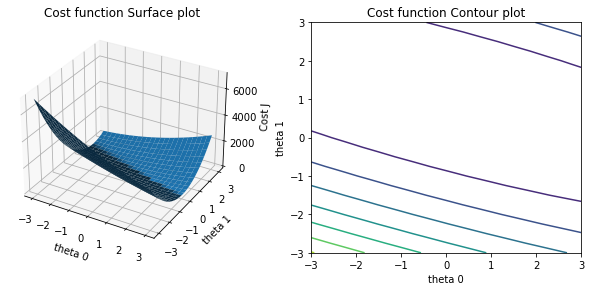

In [29]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [87]:
alpha = 0.1        # learning parameter
maxsteps= 100000    # number of iterations that the algorithm is running

# First estimates for our parameters
theta = np.array([0.1, 0.1])

theta, theta_Hist = gradient_descent(x, y, theta, alpha, m, maxsteps)
print(theta_Hist)


[[2.85000000e-01 7.15833333e-01]
 [3.18069444e-01 8.55368056e-01]
 [3.17599421e-01 8.88900637e-01]
 ...
 [3.31818401e-16 1.00000000e+00]
 [3.33065854e-16 1.00000000e+00]
 [3.34299447e-16 1.00000000e+00]]


## Print found optimal values



In [88]:
print("Optimized Theta0 is ", theta[0])
print("Optimized Theta1 is ", theta[1])

Optimized Theta0 is  3.3429944709435405e-16
Optimized Theta1 is  0.9999999999999999


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


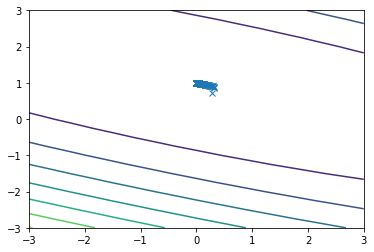

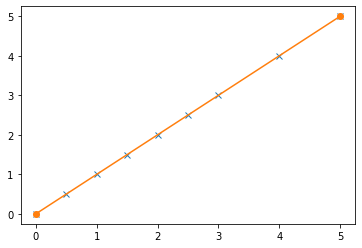

In [89]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(theta_Hist[:,0], theta_Hist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[theta[1] * xs[0] + theta[0]], [theta[1] * xs[1] + theta[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()